# 📉 Customer Churn Prediction


## 🎯 Business Problem

Customer churn refers to customers who stop using a company’s service.

In the telecom industry, high churn leads to revenue loss and increased
customer acquisition costs. Retaining existing customers is more cost-effective
than acquiring new ones.

The objective of this project is to build a machine learning model
to identify customers who are likely to churn,
so the business can take proactive retention actions.

## 📊 Dataset Overview

- Total Customers: 7,043
- Total Features: 21
- Target Variable: Churn (Yes / No)

Class Distribution:
- Non-Churn (No): 5,174
- Churn (Yes): 1,869
- Churn Rate: ~26.5%

The dataset is imbalanced, with significantly more non-churn
customers than churn customers. Therefore, recall and ROC-AUC
are prioritized over accuracy during evaluation.

In [242]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [277]:
data = pd.read_csv("Telco_Customer_Churn.csv")

In [ ]:
data.info()

In [ ]:
#checking null values
data.isnull().sum()

In [246]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [247]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [ ]:
data.isnull().sum()

In [249]:
data=data.dropna()
data.shape

(7032, 21)

## 📈 Exploratory Data Analysis (EDA)

EDA was performed to understand patterns and relationships
between customer features and churn behavior.

### Churn Class Distribution

The dataset is clearly imbalanced, with significantly more non-churn customers (0) compared to churn customers (1).

This class imbalance indicates that accuracy alone may not be a reliable performance metric.
Instead, metrics such as recall and ROC-AUC are more important for evaluating the model,
especially for correctly identifying churn customers.

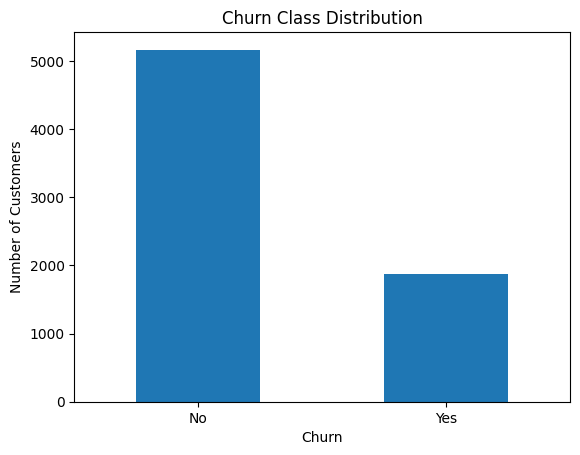

In [250]:
data['Churn'].value_counts().plot(kind='bar')

plt.title("Churn Class Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()

### Contract Type vs Churn

Customers with month-to-month contracts show significantly higher churn
compared to one-year and two-year contracts.

This suggests that longer contract commitments reduce churn risk.

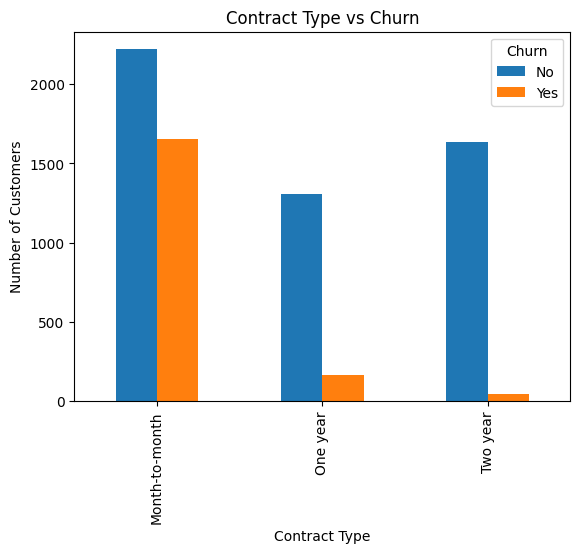

In [251]:
import matplotlib.pyplot as plt
import pandas as pd

pd.crosstab(data['Contract'], data['Churn']).plot(kind='bar')
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.show()

### Tenure vs Churn

Customers with lower tenure show higher churn.
As tenure increases, churn decreases.

This indicates new customers are at higher churn risk.

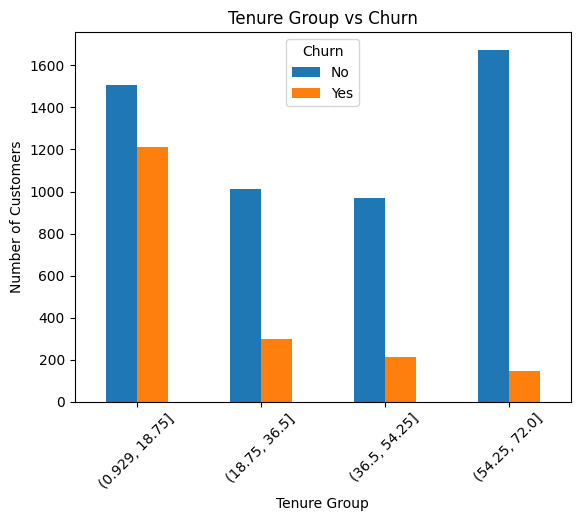

In [252]:
data['TenureGroup'] = pd.cut(data['tenure'], bins=4)

pd.crosstab(data['TenureGroup'], data['Churn']).plot(kind='bar')
plt.title("Tenure Group vs Churn")
plt.xlabel("Tenure Group")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

### Monthly Charges vs Churn

The chart shows that churn increases as monthly charges increase.
Customers in higher charge groups have noticeably more churn cases compared to lower charge groups.

This suggests that customers paying higher monthly fees may be more price-sensitive,
which could contribute to increased churn risk.

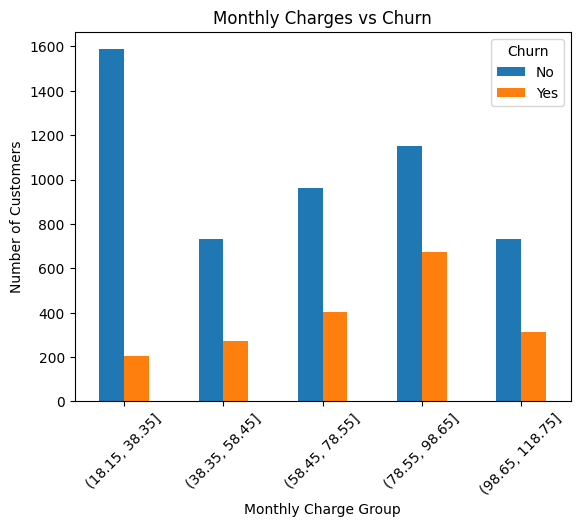

In [253]:
data['ChargeGroup'] = pd.cut(data['MonthlyCharges'], bins=5)

pd.crosstab(data['ChargeGroup'], data['Churn']).plot(kind='bar')
plt.title("Monthly Charges vs Churn")
plt.xlabel("Monthly Charge Group")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

### Tech Support vs Churn

Customers without tech support show significantly higher churn compared to those who have tech support.

This indicates that providing technical support services may improve customer satisfaction
and reduce churn risk.

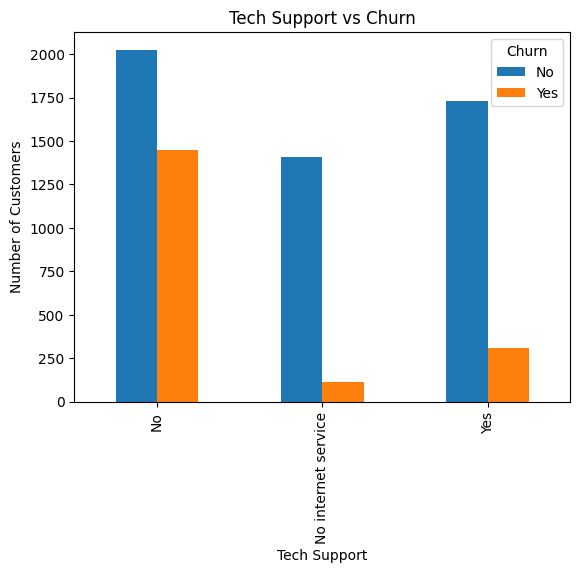

In [254]:
pd.crosstab(data['TechSupport'], data['Churn']).plot(kind='bar')
plt.title("Tech Support vs Churn")
plt.xlabel("Tech Support")
plt.ylabel("Number of Customers")
plt.show()

### Internet Service vs Churn

Customers using fiber optic internet show higher churn compared to DSL users.
Customers without internet service have the lowest churn.

This suggests that service type, pricing, or customer experience may influence churn behavior.

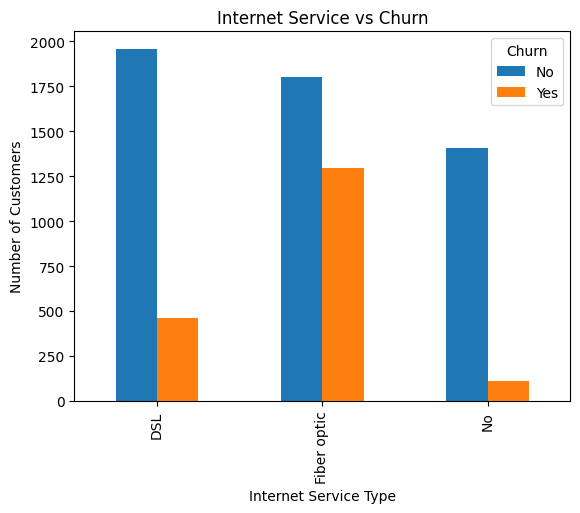

In [255]:
pd.crosstab(data['InternetService'], data['Churn']).plot(kind='bar')
plt.title("Internet Service vs Churn")
plt.xlabel("Internet Service Type")
plt.ylabel("Number of Customers")
plt.show()

In [256]:
# Convert target variable to numeric once
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

In [257]:
data["Churn"].value_counts()

,count
Churn,
0,5163
1,1869


In [258]:
x = data.drop("Churn", axis=1)
y = data["Churn"]

## ⚙️ Data Preprocessing

In [259]:
# Convert categorical variables into numerical format
x = pd.get_dummies(x, drop_first=True)

In [261]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y,test_size=0.2,random_state=42,stratify=y)

### Feature Scaling

StandardScaler was applied to normalize the feature values.  
This ensures that all numerical features are on a similar scale,
which helps improve the performance of models like Logistic Regression.

In [262]:
# Fit scaler on training data and transform it
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [263]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [264]:
y_pred = model.predict(x_test)

print('accuracy score',accuracy_score(y_test, y_pred)*100)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)*100
print("ROC-AUC Score:", roc_auc)

# Generate confusion matrix
print('confusion matrix',confusion_matrix(y_test, y_pred))

accuracy score 78.1094527363184
ROC-AUC Score: 83.20956561802755
confusion matrix [[980  53]
 [255 119]]


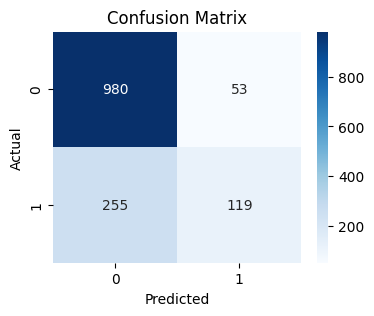

In [265]:
cm = [[980, 53],
      [255, 119]]

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [266]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1033
           1       0.69      0.32      0.44       374

    accuracy                           0.78      1407
   macro avg       0.74      0.63      0.65      1407
weighted avg       0.77      0.78      0.75      1407



## Baseline Logistic Regression Performance

The baseline Logistic Regression model achieved:

- Accuracy: ~78%
- Churn Recall: 32%
- Churn Precision: 69%

Although overall accuracy appears reasonable, the model struggles to detect churn customers.  
With only 32% recall, a large number of churn customers are missed (high false negatives).



## Handling Class Imbalance using SMOTE

The dataset is imbalanced, with fewer churn customers compared to non-churn customers.

To improve churn detection, SMOTE (Synthetic Minority Over-sampling Technique)
was applied only to the training data.

SMOTE generates synthetic samples for the minority class,
helping the model learn churn patterns more effectively.

The test data was kept unchanged to ensure fair evaluation.

In [267]:
from imblearn.over_sampling import SMOTE

#Applying SMOTE ONLY on training data
smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

# 3. Train model on SMOTE data
model = LogisticRegression(max_iter=1000, C=0.5, solver='liblinear')
model.fit(x_train_sm, y_train_sm)

Before SMOTE: Churn
0    4130
1    1495
Name: count, dtype: int64
After SMOTE: Churn
0    4130
1    4130
Name: count, dtype: int64


LogisticRegression(C=0.5, max_iter=1000, solver='liblinear')

In [268]:
y_pred_smote = model.predict(x_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_smote))

print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(x_test)[:,1])*100)

Confusion Matrix:
 [[929 104]
 [176 198]]

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407

ROC-AUC: 83.20231815334598


## SMOTE Model Performance

After applying SMOTE, the model performance improved:

- Accuracy: ~80%
- Churn Recall: 53%
- Churn Precision: 66%
- ROC-AUC: ~83%

Compared to the baseline model, churn recall increased significantly
(32% → 53%), meaning fewer churn customers are missed.

The model now detects more at-risk customers while maintaining
stable accuracy and balanced precision.

In [269]:
y_prob_smote = model.predict_proba(x_test)[:,1]

# Change threshold here
threshold = 0.4
y_pred_tuned = (y_prob_smote >= threshold).astype(int)

print("Confusion Matrix (Tuned):\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report (Tuned):\n")
print(classification_report(y_test, y_pred_tuned))
roc_auc = roc_auc_score(y_test, y_prob_smote)*100
print("ROC-AUC:", roc_auc)

Confusion Matrix (Tuned):
 [[900 133]
 [148 226]]

Classification Report (Tuned):

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1033
           1       0.63      0.60      0.62       374

    accuracy                           0.80      1407
   macro avg       0.74      0.74      0.74      1407
weighted avg       0.80      0.80      0.80      1407

ROC-AUC: 83.20231815334598


## SMOTE Model with Threshold Tuning (0.4)

To further improve churn detection, the classification threshold
was reduced from 0.5 to 0.4.

Performance after tuning:

- Accuracy: ~80%
- Churn Recall: 60%
- Churn Precision: 63%
- ROC-AUC: ~83%

Lowering the threshold increased churn recall from 53% to 60%,
meaning more at-risk customers are correctly identified.

This model provides a better balance between recall and precision
while maintaining stable overall accuracy.

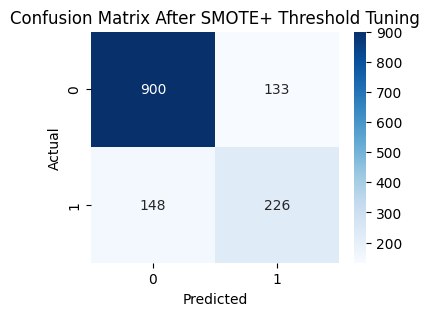

In [270]:
cmm = [[900, 133],
      [148, 226]]

plt.figure(figsize=(4,3))
sns.heatmap(cmm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix After SMOTE+ Threshold Tuning")
plt.show()

## 📌 Model Comparison

| Model | Recall | Precision | Accuracy |
|--------|--------|-----------|----------|
| Baseline Logistic | 32% | 69% | 78% |
| SMOTE (0.5) | 53% | 66% | 80% |
| SMOTE + Tuned (0.4) | 60% | 63% | 80% |

SMOTE with threshold tuning significantly improved churn detection
while maintaining stable overall performance.

In [271]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [272]:
# Create pipeline (Scaling + SMOTE + Model)
pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000, C=0.5, solver='liblinear'))])

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation using ROC-AUC
cv_scores = cross_val_score(pipeline, x, y, cv=skf, scoring='roc_auc')

print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC:", cv_scores.mean())

Cross-Validation ROC-AUC Scores: [0.84588784 0.8404626  0.83726048 0.83525577 0.83635301]
Mean ROC-AUC: 0.8390439412574743


## 🔄 Cross-Validation Results

5-fold cross-validation produced consistent ROC-AUC scores
with a mean of ~0.84.

The scores are close to the test ROC-AUC (~0.83),
indicating that the model generalizes well
and does not show signs of significant overfitting.

### Feature Importance (Logistic Regression)

The coefficients from Logistic Regression were used to determine feature importance.  
Features with higher absolute coefficient values have a stronger impact on churn prediction.

Positive coefficients increase churn probability, while negative coefficients reduce it.

In [273]:
# Create DataFrame with feature names and model coefficients
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]})

feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Top 10 most important feature
feature_importance.head(10)

,Feature,Coefficient,Abs_Coefficient
1,tenure,-0.572295,0.572295
7041,InternetService_Fiber optic,0.475626,0.475626
3,TotalCharges,-0.425748,0.425748
7059,PaymentMethod_Electronic check,0.410568,0.410568
7055,Contract_One year,-0.400788,0.400788
7056,Contract_Two year,-0.390033,0.390033
7044,OnlineSecurity_Yes,-0.362715,0.362715
7050,TechSupport_Yes,-0.357111,0.357111
7061,"TenureGroup_(18.75, 36.5]",-0.277770,0.277770
7063,"TenureGroup_(54.25, 72.0]",-0.275440,0.275440


### Key Churn Drivers

Based on Logistic Regression coefficients:

- Month-to-month contracts increase churn probability.
- Higher monthly charges increase churn risk.
- Lower tenure increases churn likelihood.
- Customers without tech support show higher churn.

These insights provide actionable business understanding
of factors influencing customer retention.

In [274]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
y_prob_rf = rf.predict_proba(x_test)[:,1]


print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf)*100)
print("accuracy score",accuracy_score(y_test, y_pred_rf)*100)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

ROC-AUC: 83.07755822561359
accuracy score 79.17555081734187


In [275]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)
y_prob_gb = gb.predict_proba(x_test)[:,1]

print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_gb))
print("accuracy score",accuracy_score(y_test, y_pred_gb)*100)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.80      0.79      1407

ROC-AUC: 0.8404988326405103
accuracy score 79.60199004975125


## ✅ Final Model Selection

The SMOTE + Logistic Regression model
with threshold = 0.4 was selected as the final model.

It improved churn recall from 32% (baseline) to 60%
while maintaining stable accuracy (~80%).

This aligns with the business objective
of reducing missed churn customers.

## 📌 Conclusion

This project demonstrates how machine learning
can be used to predict customer churn
and support proactive retention strategies.

By addressing class imbalance and tuning the decision threshold,
the model significantly improved churn detection performance.

This model can support retention campaigns by identifying high-risk customers in advance.

## 🚀 Future Improvements

- Hyperparameter tuning using GridSearchCV
- Cost-sensitive learning to reduce business loss
- Model deployment using Streamlit
- Real-time monitoring and periodic retraining